## Classification of Journals on Climate Change 

**Research Hypothesis:** The aim of the study is to understand which article is best as per the reader or which article has the highest score.Aim is to classify the printed document is which type like printed document is article, news, books, etc. To show the best articles with the highest time mention in the social sites, this will help in to understand which news or article is famous on the internet.



-	EDA

-	Data Pre-processing

-	Machine Learning Classification Techniques

-	Evaluation Metrics


In [47]:
## import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from pandas import DataFrame
from textblob import TextBlob
from matplotlib import style
from google.colab import files
import io
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

uploaded=files.upload()
import warnings
warnings.filterwarnings('ignore')

Saving Climate change - Altmetric.csv to Climate change - Altmetric (1).csv


In [48]:
import chardet
with open('Climate change - Altmetric.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large   #'latin1'

data= pd.read_csv(io.BytesIO(uploaded['Climate change - Altmetric.csv']), encoding=enc['encoding'])
data.head()

,Altmetric Attention Score,Title,Journal/Collection Title,Journal ISSNs,Authors at my Institution,Departments,Output Type,OA Status,OA Type,Subjects (FoR),Affiliations (GRID),Funder,Publication Date,DOI,ISBN,National Clinical Trial ID,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,ADS Bibcode,arXiv ID,RePEc ID,SSRN,URN,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,Weibo mentions,Facebook mentions,Wikipedia mentions,Google+ mentions,LinkedIn mentions,Reddit mentions,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations,Details Page URL,Badge URL
0,6385,Temporary reduction in daily global CO2 emissi...,Nature Climate Change,"1758-678X, 1758-6798",NaN,NaN,Article,True,bronze,04 Earth Sciences; 0401 Atmospheric Sciences; ...,CICERO Center for International Climate Resear...,European Commission; Gordon and Betty Moore Fo...,2020-05-19,10.1038/s41558-020-0797-x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,813,129,23,0,4210,0,0,12,8,0,0,4,0,0,0,2,0,1663,651,https://www.altmetric.com/details/82334633,https://api.altmetric.com/v1/donut/82334633_24...
1,5516,The burden of heat-related mortality attributa...,Nature Climate Change,"1758-678X, 1758-6798",NaN,NaN,Article,False,closed,04 Earth Sciences; 0401 Atmospheric Sciences; ...,Agenzia Spaziale Italiana; Anhui Medical Unive...,Academy of Finland; Ashland (United States); C...,2021-05-31,10.1038/s41558-021-01058-x,NaN,NaN,NaN,34221128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714,67,2,0,1305,0,0,4,3,0,0,3,0,0,0,0,0,202,19,https://www.altmetric.com/details/106766301,https://api.altmetric.com/v1/donut/106766301_2...
2,5508,Welfare in the 21st century: Increasing develo...,Technological Forecasting and Social Change,0040-1625,NaN,NaN,Article,False,closed,14 Economics; 1402 Applied Economics,Stanford University,NaN,2020-07-01,10.1016/j.techfore.2020.119981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,34,0,0,13278,0,0,121,0,0,0,2,0,0,0,1,0,135,9,https://www.altmetric.com/details/80793144,https://api.altmetric.com/v1/donut/80793144_24...
3,4796,Observation-based early-warning signals for a ...,Nature Climate Change,"1758-678X, 1758-6798",NaN,NaN,Article,False,closed,04 Earth Sciences; 0405 Oceanography,Freie Universität Berlin; Potsdam Institute fo...,European Commission; Volkswagen Foundation,2021-08-05,10.1038/s41558-021-01097-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461,29,0,0,3204,0,0,1,7,0,0,12,0,0,0,4,0,150,5,https://www.altmetric.com/details/111217658,https://api.altmetric.com/v1/donut/111217658_2...
4,4697,Eat less meat: UN climate-change report calls ...,Nature,"0028-0836, 1476-4687",NaN,NaN,News,False,closed,NaN,NaN,NaN,2019-08-08,10.1038/d41586-019-02409-7,NaN,NaN,NaN,31409926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154,25,3,0,5821,0,0,25,7,0,0,23,0,0,0,2,0,134,24,https://www.altmetric.com/details/64712554,https://api.altmetric.com/v1/donut/64712554_24...


In [49]:
import re
def cleanTxt(text):
    text=re.sub(r"[\([{})\]]", "", str(text))   
    text=re.sub(r'#','',str(text))   
    text=re.sub("\'", "",str(text)) 
    text=re.sub('\s+', ' ', str(text))
    text=re.sub('\S*@\S*\s?', '', str(text)) 
    return text

In [50]:
data['Title']=data['Title'].apply(cleanTxt)
data.head()

,Altmetric Attention Score,Title,Journal/Collection Title,Journal ISSNs,Authors at my Institution,Departments,Output Type,OA Status,OA Type,Subjects (FoR),Affiliations (GRID),Funder,Publication Date,DOI,ISBN,National Clinical Trial ID,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,ADS Bibcode,arXiv ID,RePEc ID,SSRN,URN,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,Weibo mentions,Facebook mentions,Wikipedia mentions,Google+ mentions,LinkedIn mentions,Reddit mentions,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations,Details Page URL,Badge URL
0,6385,Temporary reduction in daily global CO2 emissi...,Nature Climate Change,"1758-678X, 1758-6798",NaN,NaN,Article,True,bronze,04 Earth Sciences; 0401 Atmospheric Sciences; ...,CICERO Center for International Climate Resear...,European Commission; Gordon and Betty Moore Fo...,2020-05-19,10.1038/s41558-020-0797-x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,813,129,23,0,4210,0,0,12,8,0,0,4,0,0,0,2,0,1663,651,https://www.altmetric.com/details/82334633,https://api.altmetric.com/v1/donut/82334633_24...
1,5516,The burden of heat-related mortality attributa...,Nature Climate Change,"1758-678X, 1758-6798",NaN,NaN,Article,False,closed,04 Earth Sciences; 0401 Atmospheric Sciences; ...,Agenzia Spaziale Italiana; Anhui Medical Unive...,Academy of Finland; Ashland (United States); C...,2021-05-31,10.1038/s41558-021-01058-x,NaN,NaN,NaN,34221128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714,67,2,0,1305,0,0,4,3,0,0,3,0,0,0,0,0,202,19,https://www.altmetric.com/details/106766301,https://api.altmetric.com/v1/donut/106766301_2...
2,5508,Welfare in the 21st century: Increasing develo...,Technological Forecasting and Social Change,0040-1625,NaN,NaN,Article,False,closed,14 Economics; 1402 Applied Economics,Stanford University,NaN,2020-07-01,10.1016/j.techfore.2020.119981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,34,0,0,13278,0,0,121,0,0,0,2,0,0,0,1,0,135,9,https://www.altmetric.com/details/80793144,https://api.altmetric.com/v1/donut/80793144_24...
3,4796,Observation-based early-warning signals for a ...,Nature Climate Change,"1758-678X, 1758-6798",NaN,NaN,Article,False,closed,04 Earth Sciences; 0405 Oceanography,Freie Universität Berlin; Potsdam Institute fo...,European Commission; Volkswagen Foundation,2021-08-05,10.1038/s41558-021-01097-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461,29,0,0,3204,0,0,1,7,0,0,12,0,0,0,4,0,150,5,https://www.altmetric.com/details/111217658,https://api.altmetric.com/v1/donut/111217658_2...
4,4697,Eat less meat: UN climate-change report calls ...,Nature,"0028-0836, 1476-4687",NaN,NaN,News,False,closed,NaN,NaN,NaN,2019-08-08,10.1038/d41586-019-02409-7,NaN,NaN,NaN,31409926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154,25,3,0,5821,0,0,25,7,0,0,23,0,0,0,2,0,134,24,https://www.altmetric.com/details/64712554,https://api.altmetric.com/v1/donut/64712554_24...


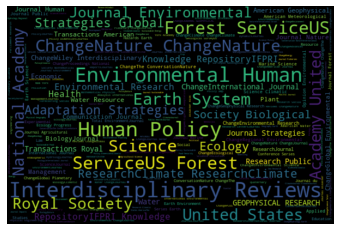

<Figure size 432x288 with 0 Axes>

In [51]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("Climate")
stopwords.add("Sciences")
stopwords.add("Letters")
stopwords.add("ChangeClimatic")
stopwords.add("ChangePart")
stopwords.add("Change")
stopwords.add("Part")
stopwords.add("ERL")
stopwords.add("Changing")
stopwords.add("Use")


wordcloud_JTitle=WordCloud(max_font_size=40,relative_scaling=.5,stopwords=stopwords,width=600,height=400).generate(data['Journal/Collection Title'].str.cat())
plt.imshow(wordcloud_JTitle, interpolation="bilinear") 
plt.axis('off')
plt.margins(x=0, y=0) 
plt.show()
plt.savefig("JTitle_wordcloud.png")

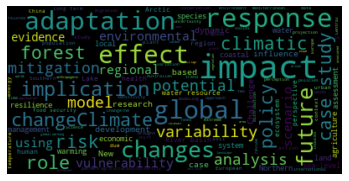

<Figure size 432x288 with 0 Axes>

In [52]:
wordcloud_Title=WordCloud(max_font_size=40,relative_scaling=.5,stopwords=stopwords).generate(data['Title'].str.cat())
plt.imshow(wordcloud_Title, interpolation="bilinear") 
plt.axis('off')
plt.margins(x=0, y=0) 
plt.show()
plt.savefig("Title_wordcloud.png")

In [53]:
print(data.shape)
data.isnull().sum()

(80249, 46)


Altmetric Attention Score             0
Title                                 0
Journal/Collection Title          20528
Journal ISSNs                     27820
Authors at my Institution         80249
Departments                       80249
Output Type                           0
OA Status                             0
OA Type                           14075
Subjects (FoR)                    19974
Affiliations (GRID)               29465
Funder                            56461
Publication Date                   2284
DOI                                9986
ISBN                              77690
National Clinical Trial ID        80249
URI                               65701
PubMed ID                         70907
PubMedCentral ID                  79184
Handle.net IDs                    73864
ADS Bibcode                       65080
arXiv ID                          80036
RePEc ID                          79895
SSRN                              79645
URN                               80123


In [54]:
data.drop(['Funder','Affiliations (GRID)','Authors at my Institution', 'Journal ISSNs','Departments', 'National Clinical Trial ID', 
           'RePEc ID','SSRN','URN', 'arXiv ID','PubMed ID', 'PubMedCentral ID','Handle.net IDs',
          'ISBN','URI','ADS Bibcode','Details Page URL','Badge URL','DOI',], axis=1, inplace=True)

In [55]:
data.head(1)

,Altmetric Attention Score,Title,Journal/Collection Title,Output Type,OA Status,OA Type,Subjects (FoR),Publication Date,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,Weibo mentions,Facebook mentions,Wikipedia mentions,Google+ mentions,LinkedIn mentions,Reddit mentions,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations
0,6385,Temporary reduction in daily global CO2 emissi...,Nature Climate Change,Article,True,bronze,04 Earth Sciences; 0401 Atmospheric Sciences; ...,2020-05-19,813,129,23,0,4210,0,0,12,8,0,0,4,0,0,0,2,0,1663,651


In [56]:
data.dropna(inplace=True)

- Authors at my Institution, Departments, National Clinical Trial ID has all the missing observation i.e variable contain no data (80249). RePEc ID:79895,SSRN: 79645, URN: 80123,'arXiv ID','PubMed ID', 'PubMedCentral ID','Handle.net IDs' variables contains 90-95% missing information.All these variables are not important in Achieving research question, So we are dropping these variables.

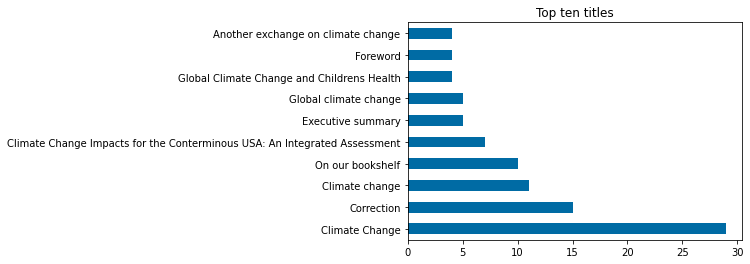

In [57]:
data['Title'].value_counts()[1:11].plot.barh(title='Top ten titles')

### Data Visualization

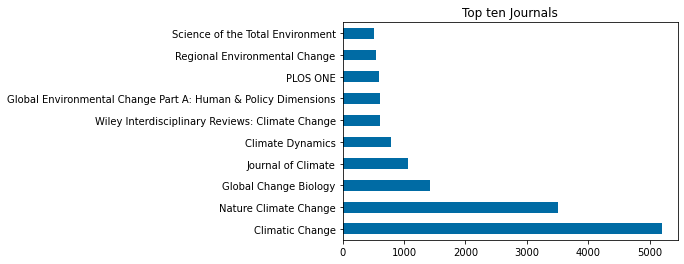

In [58]:
data['Journal/Collection Title'].value_counts().iloc[[0,1,2,3,4,5,6,7,8,9]].plot.barh(
    title = 'Top ten Journals')

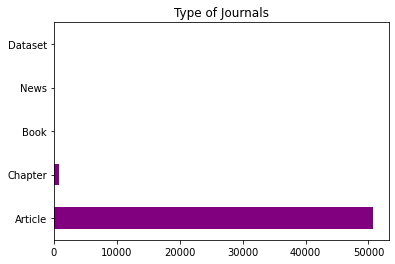

In [59]:
data['Output Type'].value_counts().plot.barh( color='purple',
    title = 'Type of Journals')

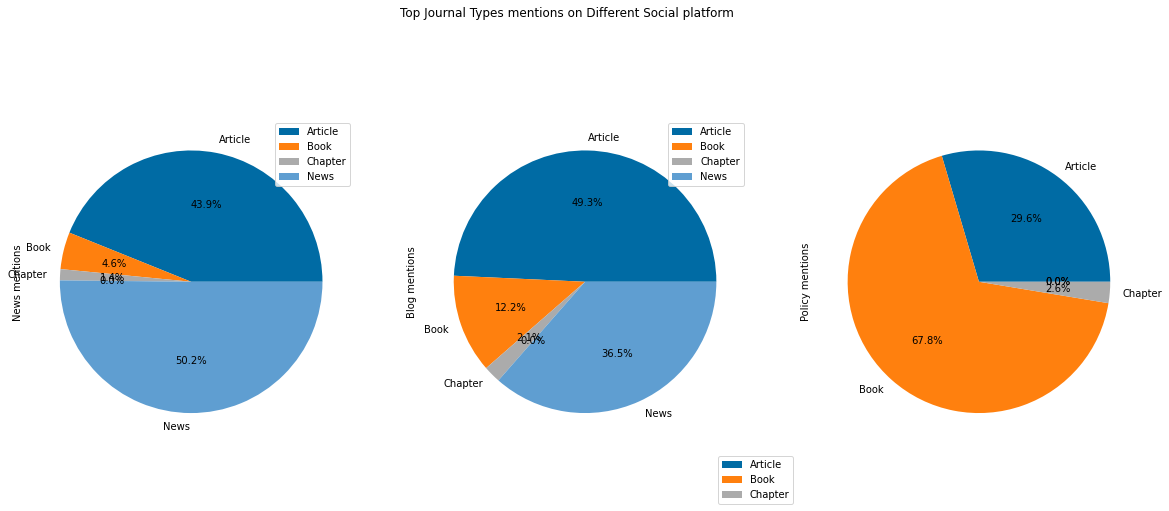

In [60]:
style.use('tableau-colorblind10')
data.groupby('Output Type')[['News mentions','Blog mentions', 'Policy mentions']].mean().plot(kind='pie',autopct='%1.1f%%', subplots=True,
    title='Top Journal Types mentions on Different Social platform', figsize=(20,8))
plt.legend(loc='upper Left', bbox_to_anchor=(-0.05,-0.015))
plt.show()

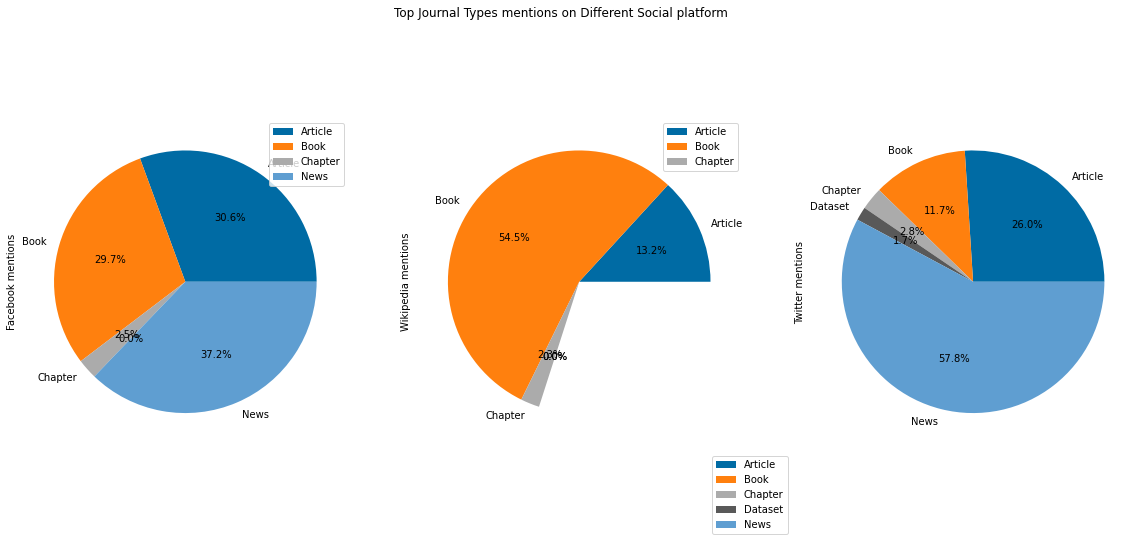

In [61]:
style.use('tableau-colorblind10')
data.groupby('Output Type')[['Facebook mentions', 'Wikipedia mentions','Twitter mentions']].mean().plot(kind='pie',autopct='%1.1f%%', subplots=True,
    title='Top Journal Types mentions on Different Social platform', figsize=(20,8))
plt.legend(loc='upper Left', bbox_to_anchor=(-0.05,-0.015))
plt.show()

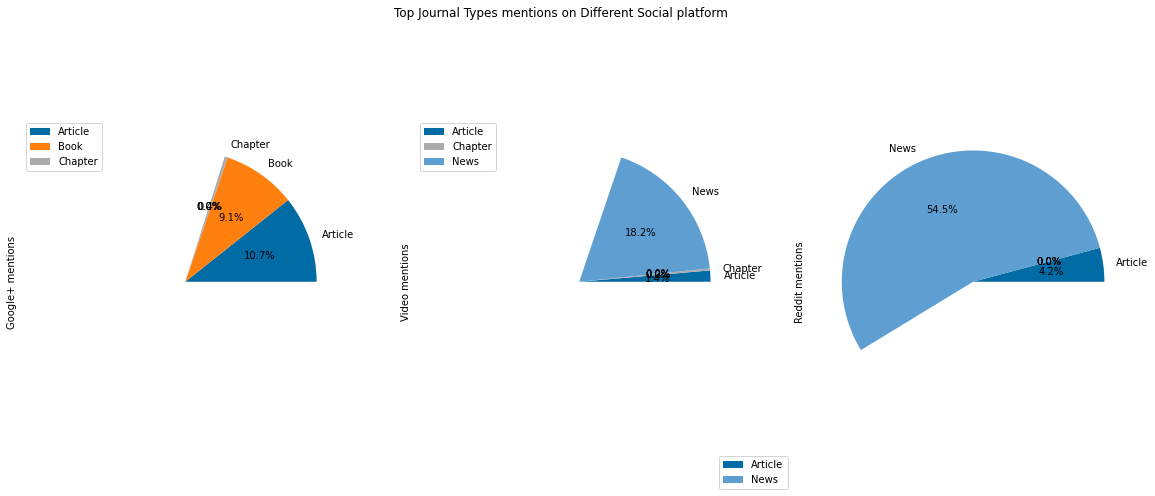

In [62]:
style.use('tableau-colorblind10')
data.groupby('Output Type')[['Google+ mentions','Video mentions','Reddit mentions']].mean().plot(kind='pie',autopct='%1.1f%%', subplots=True,
    title='Top Journal Types mentions on Different Social platform', figsize=(20,8))
plt.legend(loc='upper Left', bbox_to_anchor=(-0.05,-0.015))
plt.show()

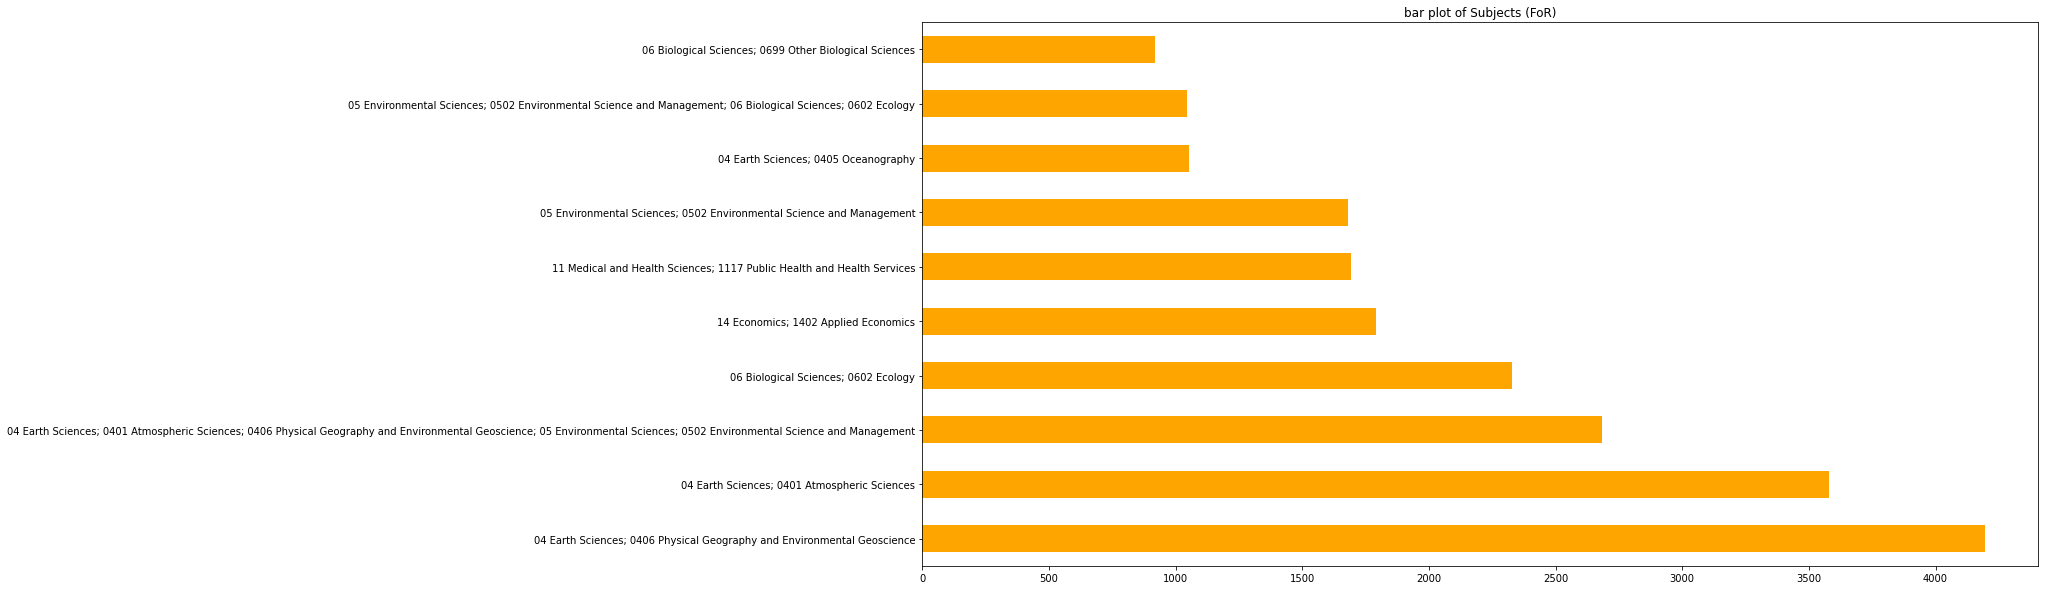

In [63]:
data['Subjects (FoR)'].value_counts()[0:10].plot.barh(title='bar plot of Subjects (FoR)', color='orange', figsize= (20,10))

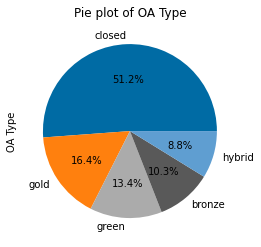

In [64]:
data['OA Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Pie plot of OA Type')

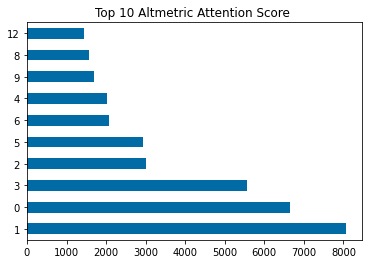

In [65]:
data['Altmetric Attention Score'].value_counts()[0:10].plot.barh(title='Top 10 Altmetric Attention Score ')

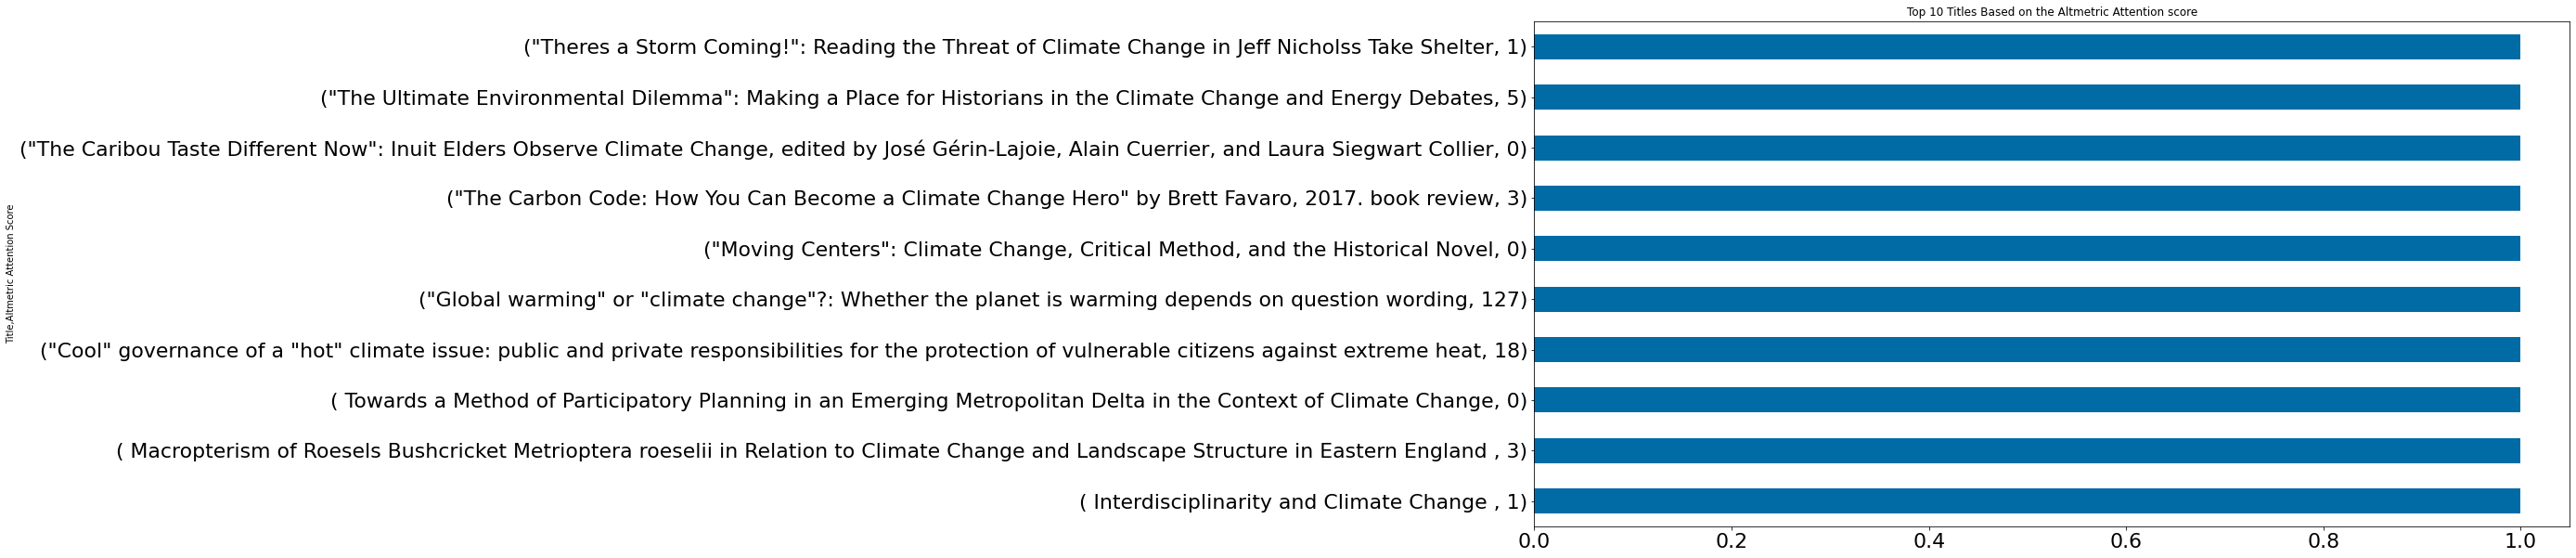

In [66]:
data.groupby('Title')['Altmetric Attention Score'].value_counts()[0:10].plot(kind='barh', title='Top 10 Titles Based on the Altmetric Attention score', figsize=(20,10),fontsize=22)

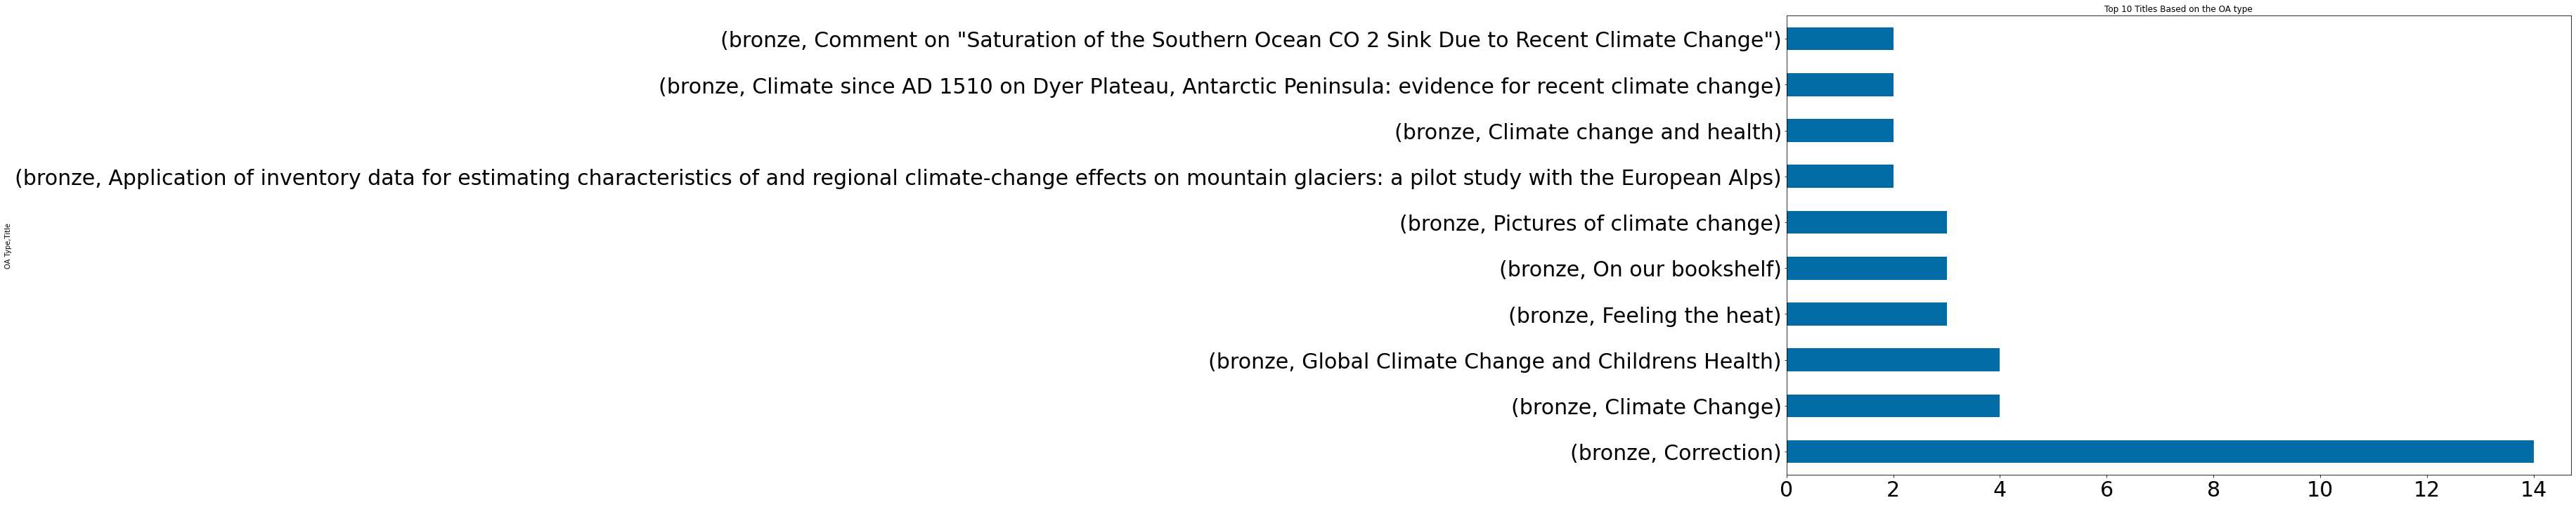

In [67]:
data.groupby('OA Type')['Title'].value_counts()[0:10].plot(kind='barh', title='Top 10 Titles Based on the OA type', figsize=(20,12),fontsize=30)

In [68]:
#To show the best articles with the highest time mention in the social sites, this will help in to understand which news or article is famous on the internet.
data.head(1)

,Altmetric Attention Score,Title,Journal/Collection Title,Output Type,OA Status,OA Type,Subjects (FoR),Publication Date,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,Weibo mentions,Facebook mentions,Wikipedia mentions,Google+ mentions,LinkedIn mentions,Reddit mentions,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations
0,6385,Temporary reduction in daily global CO2 emissi...,Nature Climate Change,Article,True,bronze,04 Earth Sciences; 0401 Atmospheric Sciences; ...,2020-05-19,813,129,23,0,4210,0,0,12,8,0,0,4,0,0,0,2,0,1663,651


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer='word',min_df=3,max_features=10000,ngram_range=(3,3))

In [73]:
data['Output Type_enc']=pd.factorize(data['Output Type'])[0]      ###for factorize qualitative data
data['Output Type_enc'].head()

0    0
1    0
2    0
3    0
5    0
Name: Output Type_enc, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['Title'],data['Output Type_enc'],test_size=0.2,random_state=42)

In [75]:
import nltk
from textblob import TextBlob
nltk.download('punkt')
def splittokens(text):
    text=text
    return TextBlob(text).words
data['Title'].head().apply(splittokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [Temporary, reduction, in, daily, global, CO2,...
1    [The, burden, of, heat-related, mortality, att...
2    [Welfare, in, the, 21st, century, Increasing, ...
3    [Observation-based, early-warning, signals, fo...
5    [Ecological, memory, modifies, the, cumulative...
Name: Title, dtype: object

In [76]:
nltk.download('wordnet')
def splitlemmas(text):
    text=text.lower()
    words=TextBlob(text).words
    return[word.lemma for word in words]
data['Title'].head().apply(splitlemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [temporary, reduction, in, daily, global, co2,...
1    [the, burden, of, heat-related, mortality, att...
2    [welfare, in, the, 21st, century, increasing, ...
3    [observation-based, early-warning, signal, for...
5    [ecological, memory, modifies, the, cumulative...
Name: Title, dtype: object

In [77]:
transformer=CountVectorizer(analyzer=splitlemmas).fit(data['Title'])
print(len(transformer.vocabulary_))
print(transformer.get_feature_names())

29421
['0', '0-1.2', '0-262-19444-9', '0-262-19445-7', '0-262-69238-4', '0-262-69239-2', '0-521-43829-2', '0-521-86471-2', '0-9673429-6-1', '0-group', '0.1°', '0.2', '0.5', '000', '000-year', '000-year-old', '000–7600', '027', '0412', '0521632501', '0521662427', '0670089133', '069551', '08/381', '08/390', '084019', '0872867153', '0–1.2', '0–6', '1', '1,000', '1,500', '1,500-km', '1,800', '1,800-year', '1-3', '1-d', '1-km', '1.0', '1.0°c', '1.3', '1.5', '1.5-yr', '1.5°', '1.5°c', '1.5–2', '1.5–2°c', '1.5–4', '1.6', '1.7', '1/3', '1/4', '10', '10,000', '10,000yr', '10,300', '10,500', '10-year', '10.00–', '10.1002/bies.201600058', '10.1007/s11367-012-0488-6', '10.4172/2155', '10.4172/2155-9597.1000132', '10.7–9.9', '100', '100,000', '100-plus', '100-year', '100-year-return-period', '100-yr', '100.00', '1000', '1000-1100', '1001–2099', '100ka', '101', '102', '104', '106696', '108,000', '108268', '1089-year', '109', '1097–1114', '10:04', '10be', '10th', '10th-14th', '10years', '10°', '10–11

In [78]:
X_train =transformer.transform(x_train)
X_test =transformer.transform(x_test)

Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

tree = DecisionTreeClassifier(criterion='entropy',random_state=0) #criterion = entopy, gini
tree.fit(X_train, y_train)
treepred = tree.predict(X_test)

print(confusion_matrix(y_test, treepred))
print(round(accuracy_score(y_test, treepred),2)*100)

[[10038     0    96     2]
 [    2     0     0     0]
 [  141     0    28     0]
 [    2     0     0     0]]
98.0


In [80]:
print(classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10136
           1       0.00      0.00      0.00         2
           2       0.23      0.17      0.19       169
           3       0.00      0.00      0.00         2

    accuracy                           0.98     10309
   macro avg       0.30      0.29      0.29     10309
weighted avg       0.97      0.98      0.97     10309



In [81]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
CV1 = (cross_val_score(tree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
CV1

0.9756268330317047

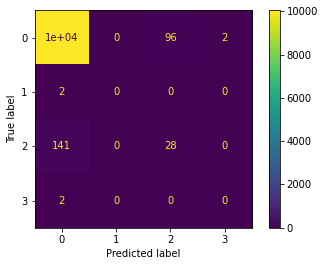

In [82]:
plot_confusion_matrix(tree, X_test, y_test)  
plt.show()

Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100,random_state=42)
random.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = random.predict(X_test)

In [85]:
print(confusion_matrix(y_test, y_pred ))
print(round(accuracy_score(y_test, y_pred),2)*100)

[[10131     0     5     0]
 [    2     0     0     0]
 [  152     0    17     0]
 [    2     0     0     0]]
98.0


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10136
           1       0.00      0.00      0.00         2
           2       0.77      0.10      0.18       169
           3       0.00      0.00      0.00         2

    accuracy                           0.98     10309
   macro avg       0.44      0.28      0.29     10309
weighted avg       0.98      0.98      0.98     10309



In [87]:
CV2 = (cross_val_score(random, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
CV2

0.9848183453377034

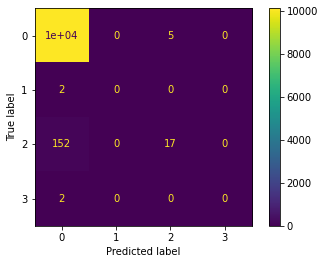

In [88]:
plot_confusion_matrix(random, X_test, y_test)  
plt.show()

XGB Tree

In [89]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,random_state=42)
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)

[[10136     0     0     0]
 [    2     0     0     0]
 [  166     0     3     0]
 [    2     0     0     0]]
98.0


In [90]:
print(classification_report(y_test,xgbprd))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10136
           1       0.00      0.00      0.00         2
           2       1.00      0.02      0.03       169
           3       0.00      0.00      0.00         2

    accuracy                           0.98     10309
   macro avg       0.50      0.25      0.26     10309
weighted avg       0.98      0.98      0.98     10309



In [91]:
CV3 = (cross_val_score(xgb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
CV3

0.9837269952830198

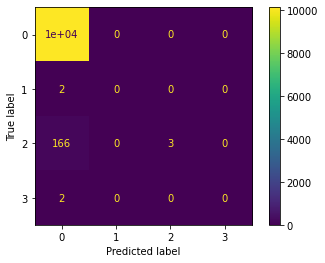

In [92]:
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()